In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
#from google.colab import files
#uploaded_files=files.upload()

In [4]:
#twitter API credentials should not be shared to anyone be careful with credentials
consumerKey='KgsHqqz45wsMereccR7I2Vpt0'
consumerSecret='CpvpZQGfgEBsuYQXi7PiCTJJldTfSwrT8s0PDYOOI05rSyJyhZ'
accessToken='1139568056890302466-XUWXAXJfRyo47XimR0AeDaVw0ckeZR'
AccessTokenSecret='UELdY984lSA5Hn9ax2bTzb2gzuTrSFPVuW9EwiIiZKyZb'

In [5]:
#create an authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)

In [6]:
authenticate.set_access_token(accessToken,AccessTokenSecret)

In [7]:
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [8]:
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

In [9]:
posts

[Status(_api=<tweepy.api.API object at 0x7f2cc06d04d0>, _json={'created_at': 'Tue Mar 22 20:33:21 +0000 2022', 'id': 1506368456588816384, 'id_str': '1506368456588816384', 'full_text': 'Sudha Varghese runs a school in Bihar, India that teaches students how to stand up for themselves and see their own potential for greatness. https://t.co/dlicoBdTRJ https://t.co/bs39Ia6PvJ', 'truncated': False, 'display_text_range': [0, 164], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/dlicoBdTRJ', 'expanded_url': 'https://gatesnot.es/3wtYe0V', 'display_url': 'gatesnot.es/3wtYe0V', 'indices': [141, 164]}], 'media': [{'id': 1506367435317817344, 'id_str': '1506367435317817344', 'indices': [165, 188], 'media_url': 'http://pbs.twimg.com/media/FOexM4tVsAAjX4d.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FOexM4tVsAAjX4d.jpg', 'url': 'https://t.co/bs39Ia6PvJ', 'display_url': 'pic.twitter.com/bs39Ia6PvJ', 'expanded_url': 'https://twitter.com/BillGates/

In [11]:
#print the 5 recent tweets
for tweets in posts[:5]:
  print(tweets.full_text+'\n')


Sudha Varghese runs a school in Bihar, India that teaches students how to stand up for themselves and see their own potential for greatness. https://t.co/dlicoBdTRJ https://t.co/bs39Ia6PvJ

Shumaila Rehamani is a polio vaccinator in Pakistan. She talks with families and community leaders to answer all their questions about the importance of vaccination. She makes sure every child in her community is protected from this disease. https://t.co/jfhzKmjqia https://t.co/924Ban8ONT

Mamello Makhele is a nurse-midwife working to improve health care for women in rural Lesotho, where there are high rates of maternal mortality. Thanks to her incredible work, many women are healthier today in Lesotho. https://t.co/NVGya9UAf8

Brooke Brown, the 2021 Washington State Teacher of the Year, helps high school seniors explore their identity. She is a phenomenal teacher and was kind enough to show me one of her favorite lessons to teach. https://t.co/Niw2gPMxCl https://t.co/PfLAqkplQh

Kakenya Ntaiya foun

In [16]:
#create a dataframe with a column called Tweets
df=pd.DataFrame((tweets.full_text for tweets in posts),columns=['tweets'])
df

,tweets
0,"Sudha Varghese runs a school in Bihar, India t..."
1,Shumaila Rehamani is a polio vaccinator in Pak...
2,Mamello Makhele is a nurse-midwife working to ...
3,"Brooke Brown, the 2021 Washington State Teache..."
4,Kakenya Ntaiya founded @KakenyasDream to enabl...
...,...
95,Experts like Trevor Bedford have done an excel...
96,I made this video a few months ago to help exp...
97,"I usually read a lot of non-fiction books, but..."
98,There’s lots of speculation about what Shakesp...


In [18]:
#clean the text
#create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\s]+','',text)
  text=re.sub(r'https?:\/\/\s+','',text)
  return text

In [21]:
a='#yolo'
b=cleanTxt(a)
b

'yolo'

In [25]:
df['tweets']=df['tweets'].apply(cleanTxt)
df

,tweets
0,"Sudha Varghese runs a school in Bihar, India t..."
1,Shumaila Rehamani is a polio vaccinator in Pak...
2,Mamello Makhele is a nurse-midwife working to ...
3,"Brooke Brown, the 2021 Washington State Teache..."
4,Kakenya Ntaiya founded to enable girls’ educa...
...,...
95,Experts like Trevor Bedford have done an excel...
96,I made this video a few months ago to help exp...
97,"I usually read a lot of non-fiction books, but..."
98,There’s lots of speculation about what Shakesp...


In [26]:
#subjectivity and polarity
#polarity means facts(negetive tweet or positive)
#subjectivity means personal comments or opinions
df.to_csv("tweets.csv",index=False)

In [31]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [32]:
#create two columns
df["Subjectivity"]=df['tweets'].apply(getSubjectivity)
df['Polarity']=df['tweets'].apply(getPolarity)
df

,tweets,Subjectivity,Polarity
0,"Sudha Varghese runs a school in Bihar, India t...",1.000000,0.300000
1,Shumaila Rehamani is a polio vaccinator in Pak...,0.888889,0.500000
2,Mamello Makhele is a nurse-midwife working to ...,0.428000,0.352000
3,"Brooke Brown, the 2021 Washington State Teache...",0.688000,0.352000
4,Kakenya Ntaiya founded to enable girls’ educa...,0.783333,-0.044444
...,...,...,...
95,Experts like Trevor Bedford have done an excel...,0.818182,0.412121
96,I made this video a few months ago to help exp...,0.351515,0.145455
97,"I usually read a lot of non-fiction books, but...",0.430000,0.130000
98,There’s lots of speculation about what Shakesp...,0.200000,-0.300000


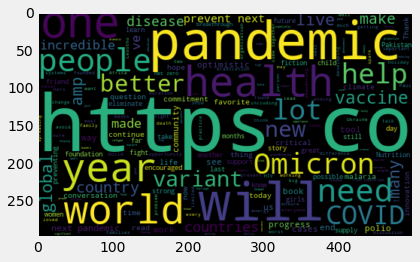

In [35]:
#plot the wordcloud
allWords=' '.join([twts for twts in df['tweets']])
#allWords
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.grid()
plt.show()

In [36]:
#Create a function to computer if the tweet is negative, neutral or postive
def getAnalysis(score):
  if (score<0):
    return 'Negative'
  elif(score==0):
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,tweets,Subjectivity,Polarity,Analysis
0,"Sudha Varghese runs a school in Bihar, India t...",1.000000,0.300000,Positive
1,Shumaila Rehamani is a polio vaccinator in Pak...,0.888889,0.500000,Positive
2,Mamello Makhele is a nurse-midwife working to ...,0.428000,0.352000,Positive
3,"Brooke Brown, the 2021 Washington State Teache...",0.688000,0.352000,Positive
4,Kakenya Ntaiya founded to enable girls’ educa...,0.783333,-0.044444,Negative
...,...,...,...,...
95,Experts like Trevor Bedford have done an excel...,0.818182,0.412121,Positive
96,I made this video a few months ago to help exp...,0.351515,0.145455,Positive
97,"I usually read a lot of non-fiction books, but...",0.430000,0.130000,Positive
98,There’s lots of speculation about what Shakesp...,0.200000,-0.300000,Negative


In [37]:
sortedDF=df.sort_values(by=['Polarity'])  #sorts the tweet based on most negetive to positive
sortedDF

,tweets,Subjectivity,Polarity,Analysis
61,mRna vaccines still can't meet all the demand...,1.000000,-0.500000,Negative
46,: So tough question: where do you think SA...,0.833333,-0.388889,Negative
98,There’s lots of speculation about what Shakesp...,0.200000,-0.300000,Negative
35,The omicron surge is an unfortunate reminder t...,1.000000,-0.250000,Negative
78,The big unknown is how sick omicron makes you....,0.654497,-0.190476,Negative
...,...,...,...,...
5,I've been lucky to meet and learn from so many...,0.744444,0.577778,Positive
72,One of my favorite holiday traditions is shari...,0.900000,0.600000,Positive
71,The world has lost a hero. Archbishop Desmond ...,0.583333,0.666667,Positive
67,Understanding how the connections in our brain...,0.700000,0.666667,Positive


In [40]:
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i])=='Positive':
    print(str(j)+'.'+sortedDF['tweets'][i])
    print()
    j=j+1

1.Sudha Varghese runs a school in Bihar, India that teaches students how to stand up for themselves and see their own potential for greatness. https://t.co/dlicoBdTRJ https://t.co/bs39Ia6PvJ

2.Shumaila Rehamani is a polio vaccinator in Pakistan. She talks with families and community leaders to answer all their questions about the importance of vaccination. She makes sure every child in her community is protected from this disease. https://t.co/jfhzKmjqia https://t.co/924Ban8ONT

3.Mamello Makhele is a nurse-midwife working to improve health care for women in rural Lesotho, where there are high rates of maternal mortality. Thanks to her incredible work, many women are healthier today in Lesotho. https://t.co/NVGya9UAf8

4.Brooke Brown, the 2021 Washington State Teacher of the Year, helps high school seniors explore their identity. She is a phenomenal teacher and was kind enough to show me one of her favorite lessons to teach. https://t.co/Niw2gPMxCl https://t.co/PfLAqkplQh

5.I've been

In [41]:
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i])=='Negative':
    print(str(j)+'.'+sortedDF['tweets'][i])
    print()
    j=j+1

1.Kakenya Ntaiya founded  to enable girls’ education and end harmful traditional practices like child marriage. Her story is a powerful example of how one person’s act of bravery can spark dramatic change. https://t.co/qrEJrqOrwD https://t.co/209Cx2e266

2.: I’ve spent my life working in agriculture, so when I think beyond the humanitarian toll I’m seeing in Ukraine, my focus a…

3.What a devastating loss. Paul is a hero, and I was fortunate to call him a friend. I have never known anyone who was more passionate about reducing the world’s worst inequities in health—or who did more to live by his values. https://t.co/8PWPdGHe7A

4.One person’s act of bravery can spark dramatic change in hundreds of lives. ’s story is a powerful example. https://t.co/jfqLInI7Me

5.I wholeheartedly agree with Larry's view that all companies need to be actively preparing for their net zero transition - shareholders, employees, customers, communities, and regulators expect it. https://t.co/x0xPNS5I8A

6.The

In [42]:
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i])=='Neutral':
    print(str(j)+'.'+sortedDF['tweets'][i])
    print()
    j=j+1

1.Paul was never happier than when he was caring for patients in one of the clinics he helped create. My heart goes out to his family and friends, his colleagues, and all the people whose lives he touched.

2.Thank you  for the productive discussions on the steps being taken in Pakistan to eliminate polio. I’m encouraged by the country’s commitment to eradication and am optimistic that if everyone remains vigilant, we can endpolio. https://t.co/cMAw3ZfDxr

3.I believe that COVID-19 can be the last pandemic. ‘How to Prevent the Next Pandemic’ will explain why. https://t.co/aLGabnIcmx

4.Science fiction can help expand our understanding by pushing the limits of what is possible. https://t.co/PKf8fwEvbj

5.The Institute for Health Metrics and Evaluation _UW found that improving trust could make a critical difference when it comes to ending this pandemic and preventing the next one. https://t.co/wjRH4tvtUK

6.Strengthening health systems is critical to preventing future pandemics.  shows h

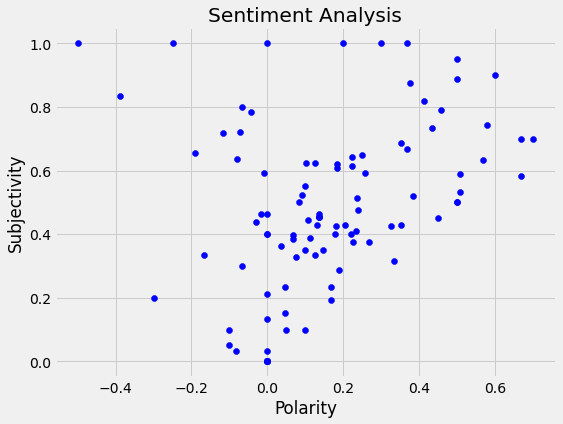

In [45]:
#plot the polarity and subjectcivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis")
plt.show()

In [46]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweets']
ptweets
round((ptweets.shape[0]/df.shape[0])*100,1)

67.0

In [47]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['tweets']
ptweets
round((ptweets.shape[0]/df.shape[0])*100,1)

18.0

In [48]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['tweets']
ptweets
round((ptweets.shape[0]/df.shape[0])*100,1)

15.0

In [49]:
df['Analysis'].value_counts()

Positive    67
Negative    18
Neutral     15
Name: Analysis, dtype: int64

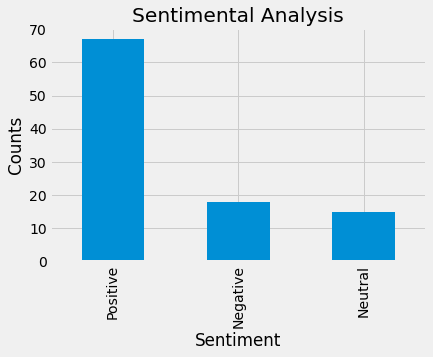

In [51]:
plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()